In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [2]:
dataset = pd.read_csv(r"C:\Users\fenil\OneDrive\Documents\Desktop\Advance power bi\car_price.csv")
dataset.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [3]:
dataset.shape

(5512, 10)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5511 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5511 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


# remove null 

In [5]:
dataset.isnull().sum()

Unnamed: 0             0
car_name               0
car_prices_in_rupee    1
kms_driven             0
fuel_type              0
transmission           0
ownership              1
manufacture            0
engine                 0
Seats                  0
dtype: int64

In [6]:
dataset.dropna(inplace=True) 

# car name 

In [7]:
def company_name (X):
    return X[:X.index(" ")]

In [8]:
def car_name (X):
    return X[X.index(" ")+1:]

In [9]:
dataset["company_name"] = dataset["car_name"].apply(company_name)

In [10]:
dataset["car_name"] = dataset["car_name"].apply(car_name)

# car_prices_in_rupee 

In [11]:
dataset["car_prices_in_rupee"] = dataset["car_prices_in_rupee"].str.replace(",","")

In [12]:
def convert_price(price):
    price = str(price).replace(',', '').strip().lower()
    if 'lakh' in price:
        return float(price.replace('lakh', '').strip()) * 100000
    elif 'crore' in price:
        return float(price.replace('crore', '').strip()) * 10000000
    elif price.isdigit():
        return float(price)
    else:
        try:
            return float(price)
        except:
            return None

In [13]:
dataset['car_prices_in_rupee'] = (
    dataset['car_prices_in_rupee']
    .apply(convert_price)         # apply your function
    .apply(lambda x: round(x) if pd.notnull(x) else None)  # round off
    .astype('Int64')              # now safely convert to integer
)

# kms driven 

In [14]:
def clean_kms(value):
    try:
        return int(str(value).lower().replace('kms', '').replace(',', '').strip())
    except:
        return None

dataset['kms_driven'] = dataset['kms_driven'].apply(clean_kms)


# engine 

In [15]:
def clean_engine(value):
    try:
        return int(str(value).lower().replace('cc', '').replace(',', '').strip())
    except:
        return None

dataset['engine'] = dataset['engine'].apply(clean_engine)


# seats  

In [16]:
import pandas as pd

# Example: dataset = pd.read_csv("your_file.csv")

dataset['Seats'] = (
    dataset['Seats']
    .astype(str)                    # ensure it's a string
    .str.replace('seats', '', case=False, regex=False)  # remove 'Seats' or 'seats'
    .str.strip()                    # remove spaces
    .astype('Int64')                # convert to integer (nullable type)
)


# ownership 

In [17]:
def clean_ownership(value):
    """Normalize ownership column (e.g., '1st Owner' → 1, '2nd Owner' → 2)."""
    if pd.isna(value):
        return None
    text = str(value).lower().strip()
    if '1st' in text:
        return 1
    elif '2nd' in text:
        return 2
    elif '3rd' in text:
        return 3
    else:
        return None

# manufacture 

In [18]:
import pandas as pd

# Example: dataset = pd.read_csv("your_file.csv")

dataset['manufacture'] = (
    dataset['manufacture']
    .astype(str)                           # convert everything to string
    .str.extract(r'(\d{4})')[0]            # extract only 4-digit year
    .astype('Int64')                       # convert safely to integer
)

print(dataset['manufacture'].head())
print(dataset['manufacture'].dtypes)


0    2017
1    2021
2    2016
3    2018
4    2016
Name: manufacture, dtype: Int64
Int64


In [19]:


# Generate random manufacturing dates between 2010 and 2024
random_dates = pd.to_datetime(
    np.random.randint(
        pd.Timestamp('2010-01-01').value // 10**9,
        pd.Timestamp('2024-12-31').value // 10**9,
        size=len(dataset)
    ),
    unit='s'
)

# Convert to Series and extract only the date (remove time)
dataset['manufacture'] = pd.Series(random_dates).dt.date

print(dataset['manufacture'].head())
print(dataset['manufacture'].dtypes)


0    2023-01-06
1    2013-12-23
2    2015-06-06
3    2022-11-17
4    2021-02-24
Name: manufacture, dtype: object
object


In [20]:
# Convert 'manufacture' column to datetime type
dataset['manufacture'] = pd.to_datetime(dataset['manufacture'], format='%Y-%m-%d', errors='coerce')

# Verify the conversion
print(dataset['manufacture'].head())
print(dataset['manufacture'].dtypes)


0   2023-01-06
1   2013-12-23
2   2015-06-06
3   2022-11-17
4   2021-02-24
Name: manufacture, dtype: datetime64[ns]
datetime64[ns]


In [21]:
dataset.head(3)

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,0,Compass 2.0 Longitude Option BSIV,1003000,86226,Diesel,Manual,1st Owner,2023-01-06,1956,5,Jeep
1,1,Duster RXZ Turbo CVT,1283000,13248,Petrol,Automatic,1st Owner,2013-12-23,1330,5,Renault
2,2,Camry 2.5 G,1640000,60343,Petrol,Automatic,1st Owner,2015-06-06,2494,5,Toyota


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5510 entries, 0 to 5511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           5510 non-null   int64         
 1   car_name             5510 non-null   object        
 2   car_prices_in_rupee  5510 non-null   Int64         
 3   kms_driven           5510 non-null   int64         
 4   fuel_type            5510 non-null   object        
 5   transmission         5510 non-null   object        
 6   ownership            5510 non-null   object        
 7   manufacture          5508 non-null   datetime64[ns]
 8   engine               5510 non-null   int64         
 9   Seats                5510 non-null   Int64         
 10  company_name         5510 non-null   object        
dtypes: Int64(2), datetime64[ns](1), int64(3), object(5)
memory usage: 527.3+ KB


In [23]:

from sklearn.preprocessing import LabelEncoder

# --- 1️⃣ Keep only year from manufacture column ---
dataset['manufacture'] = pd.to_datetime(dataset['manufacture'], errors='coerce').dt.year

# --- 2️⃣ Encode all categorical columns ---
label_encoder = LabelEncoder()

# Identify all object-type columns
categorical_cols = dataset.select_dtypes(include='object').columns

# Apply label encoding
for col in categorical_cols:
    dataset[col] = label_encoder.fit_transform(dataset[col])




In [24]:
dataset.head(3)

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,0,426,1003000,86226,1,1,1,2023.0,1956,5,12
1,1,509,1283000,13248,4,0,1,2013.0,1330,5,26
2,2,290,1640000,60343,4,0,1,2015.0,2494,5,29


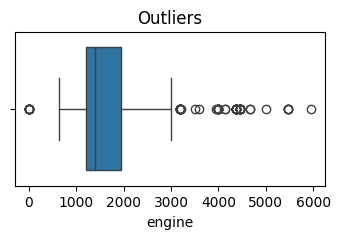

In [25]:
# Boxplot for checking outliers in 'care' column
plt.figure(figsize=(4, 2))
sns.boxplot(x=dataset['engine'])
plt.title("Outliers")
plt.show()


In [26]:
dataset.shape

(5510, 11)

In [27]:
Q1 = dataset['engine'].quantile(0.25)
Q3 = dataset['engine'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [28]:
dataset = dataset[(dataset['engine'] <= upper_limit)]

In [29]:
dataset.head(2)

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,0,426,1003000,86226,1,1,1,2023.0,1956,5,12
1,1,509,1283000,13248,4,0,1,2013.0,1330,5,26


# data_scaler 

In [30]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Your DataFrame name (use your actual DataFrame name instead of this example)
# Example: dataset = pd.read_csv("your_file.csv")

# Select only numeric columns to scale
features = ['car_name', 'car_prices_in_rupee', 'kms_driven', 'fuel_type', 'transmission',
            'ownership', 'manufacture', 'engine', 'Seats', 'company_name']

# Create a copy to store scaled data
scaled_df = dataset.copy()

# Create scaler
scaler = StandardScaler()

# Apply scaling
scaled_df[features] = scaler.fit_transform(dataset[features])

# Show first few rows
print(scaled_df.head())


   Unnamed: 0  car_name  car_prices_in_rupee  kms_driven  fuel_type  \
0           0 -0.915072            -0.076038    0.549586  -1.071548   
1           1 -0.771647             0.068143   -1.196042   0.916110   
2           2 -1.150083             0.251973   -0.069533   0.916110   
3           3 -0.075256            -0.192412   -0.874367   0.916110   
4           4  0.240971            -0.327324    0.147445   0.916110   

   transmission  ownership  manufacture    engine    Seats  company_name  
0      0.621433  -0.599933     1.384346  0.875811 -0.34719     -0.427244  
1     -1.609184  -0.599933    -0.917411 -0.342565 -0.34719      1.297266  
2     -1.609184  -0.599933    -0.457059  1.922914 -0.34719      1.666804  
3     -1.609184  -0.599933     1.154170 -0.597529 -0.34719     -0.919962  
4      0.621433  -0.599933     0.923994 -0.597529 -0.34719      1.789984  


In [31]:
scaled_df.head(5)

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,0,-0.915072,-0.076038,0.549586,-1.071548,0.621433,-0.599933,1.384346,0.875811,-0.34719,-0.427244
1,1,-0.771647,0.068143,-1.196042,0.916110,-1.609184,-0.599933,-0.917411,-0.342565,-0.34719,1.297266
2,2,-1.150083,0.251973,-0.069533,0.916110,-1.609184,-0.599933,-0.457059,1.922914,-0.34719,1.666804
3,3,-0.075256,-0.192412,-0.874367,0.916110,-1.609184,-0.599933,1.154170,-0.597529,-0.34719,-0.919962
4,4,0.240971,-0.327324,0.147445,0.916110,0.621433,-0.599933,0.923994,-0.597529,-0.34719,1.789984
